In [3]:
#For installing the fork of pynucastro with partition functions.
#!pip install -e ../

Obtaining file:///Users/chris/codes/copy/pynucastro


  Attempting uninstall: pynucastro
    Found existing installation: pynucastro 1.4.0
    Uninstalling pynucastro-1.4.0:
      Successfully uninstalled pynucastro-1.4.0
  Running setup.py develop for pynucastro
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pynucastro as pyna   
import matplotlib.pyplot as plt
from pynucastro.networks import StarKillerNetwork                              
library_file = '/Users/chris/Documents/GitHub/flame-wave/reaction_networks//re\
sults07070315'                                                                 
                                                                               
mylibrary = pyna.rates.Library(library_file)                                   
                                                                               
nuclei = ['n', 'c12', 'mg23']                                                  
                                                                               
lib = mylibrary.linking_nuclei(nuclei, with_reverse=True)                      
network = pyna.StarKillerNetwork(libraries=lib)                                
#remake the network with only #c12 + c12 -> n + mg23                           
network = pyna.StarKillerNetwork(rates=network.rates[0])                       
#network.write_network()                                                                      

In [2]:
network.unique_nuclei[2]

mg23

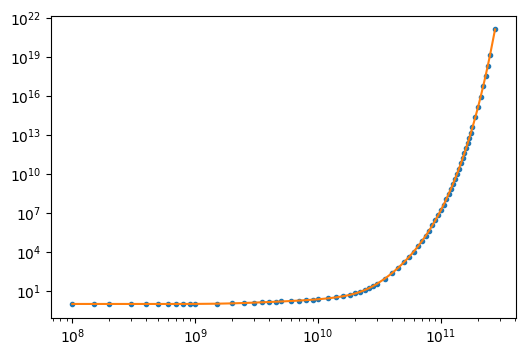

In [3]:
x = network.unique_nuclei[2].get_partition_function().temperature
y = network.unique_nuclei[2].get_partition_function().partition_function
inter = network.unique_nuclei[2].get_partition_function().interpolant
#plt.loglog(x,y, label= network.unique_nuclei[2])

plt.loglog(x,y, '.')


plt.loglog(x, np.power(10.0, inter(x/1.0e9)))

In [4]:
def estimate(T):
    return np.power(10.0, inter(T/1.0e9))

In [5]:
estimate(1e10)

2.2940000000000005